In [117]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sns
import plotly.express as px
plt.style.use("fivethirtyeight")

In [118]:
df = pd.read_csv("diabetest.csv")
df.head()
# HbA1c_level = مستوى الهيموجلوبين السكري التراكمي
# hypertension = ارتفاع ضغط الدم

gender   age  hypertension  heart_disease smoking_history    bmi  \
0  Female  80.0             0              1           never  25.19   
1  Female  54.0             0              0         No Info  27.32   
2    Male  28.0             0              0           never  27.32   
3  Female  36.0             0              0         current  23.45   
4    Male  76.0             1              1         current  20.14   

   HbA1c_level  blood_glucose_level  diabetes  
0          6.6                  140         0  
1          6.6                   80         0  
2          5.7                  158         0  
3          5.0                  155         0  
4          4.8                  155         0

In [119]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [120]:
df.drop_duplicates(inplace=True)
df.shape

(96146, 9)

In [121]:
df[['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']].describe()

age           bmi   HbA1c_level  blood_glucose_level
count  96146.000000  96146.000000  96146.000000         96146.000000
mean      41.794326     27.321461      5.532609           138.218231
std       22.462948      6.767716      1.073232            40.909771
min        0.080000     10.010000      3.500000            80.000000
25%       24.000000     23.400000      4.800000           100.000000
50%       43.000000     27.320000      5.800000           140.000000
75%       59.000000     29.860000      6.200000           159.000000
max       80.000000     95.690000      9.000000           300.000000

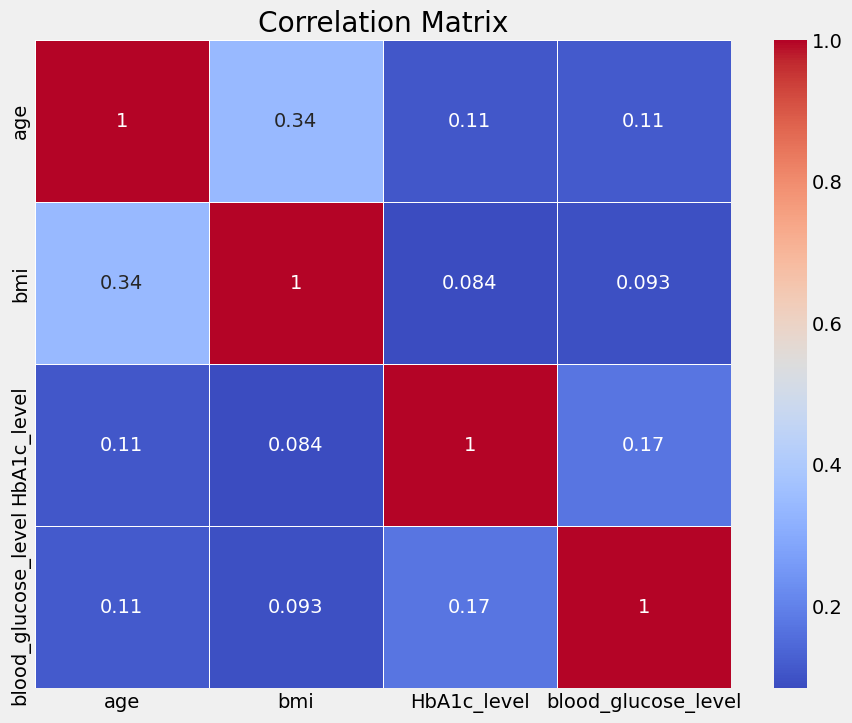

In [122]:
cols = ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']
correlation_matrix = df[cols].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

# Age analysis
* Age affect on the target
* LabelEncoder for gender column

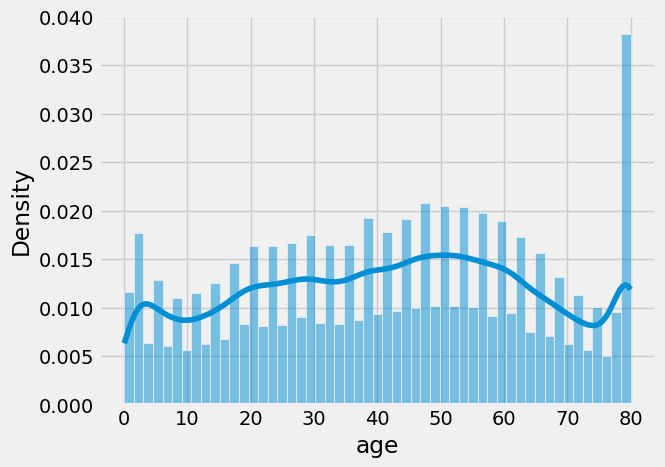

In [123]:
sns.histplot(data=df, x='age', stat='density', kde=True)
plt.show()

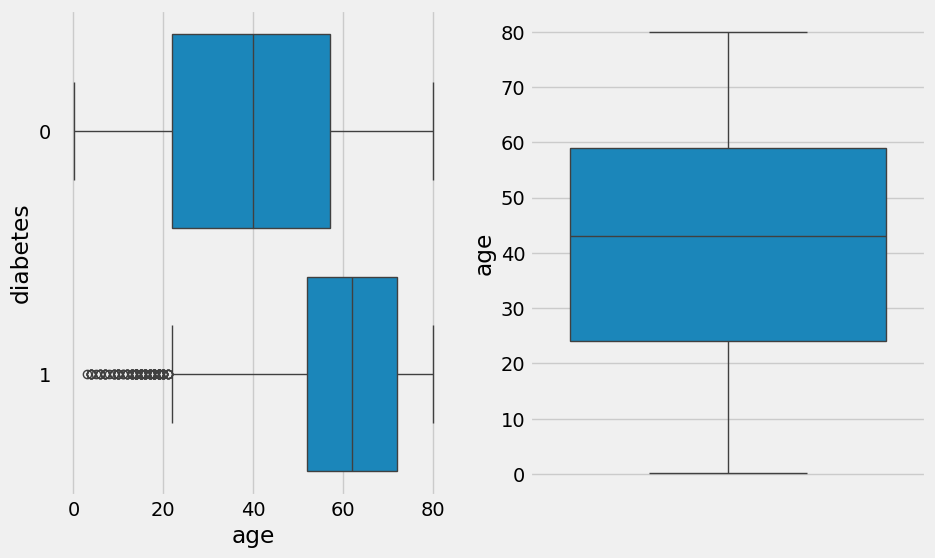

In [124]:
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
sns.boxplot(data=df, x='age', y='diabetes',orient='h')
plt.subplot(1, 2, 2)
sns.boxplot(data=df, y='age', orient='v')
plt.show()

In [125]:
from scipy.stats import ttest_ind
x0 = df[df['diabetes'] == 0]['age']
x1 = df[df['diabetes'] == 1]['age']
statistic, pvalue = ttest_ind(x0, x1, alternative='two-sided')
print(f'p-value = {pvalue}, mean(X0) = {np.mean(x0)}, mean(X1) = {np.mean(x1)}')

p-value = 0.0, mean(X0) = 39.943229147654684, mean(X1) = 60.92596085828814


In [126]:
fig = px.scatter(data_frame=df, x ="age", color='diabetes')
fig.update_layout(width=800, height=600,
                 xaxis=dict(title='age'),
                 yaxis=dict(title='diabetes'))
fig.show()

# Smoking history analysis
* Smoking history affected

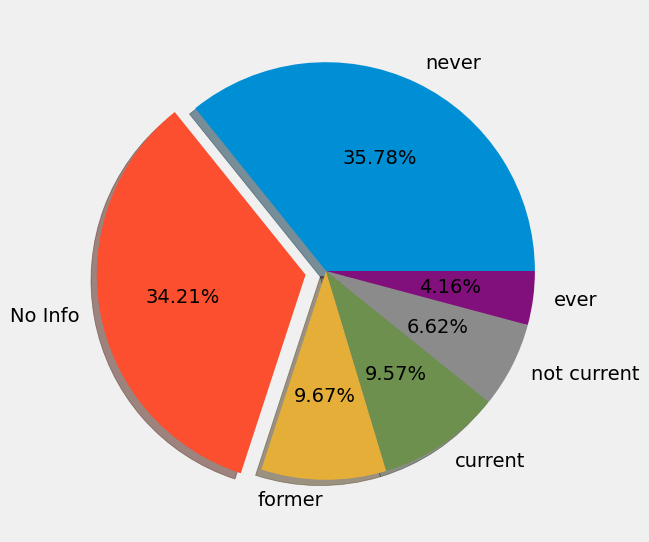

In [127]:
values = df['smoking_history'].value_counts().values
lables = df['smoking_history'].value_counts().index
plt.figure(figsize=(6, 8))
explode = [0, 0.1, 0, 0, 0, 0]
plt.pie(values, labels = lables, autopct="%1.2f%%", explode = [0, 0.1, 0, 0, 0, 0], shadow=True)
plt.show()

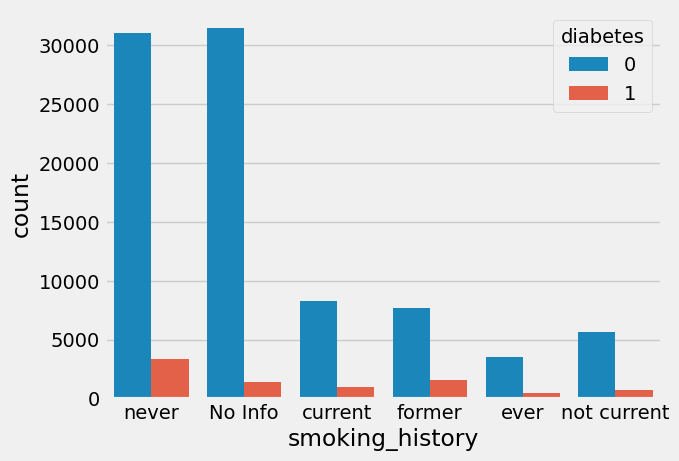

In [128]:
sns.countplot(data=df, x='smoking_history', hue='diabetes')
plt.show()

<Axes: xlabel='smoking_history', ylabel='diabetes'>

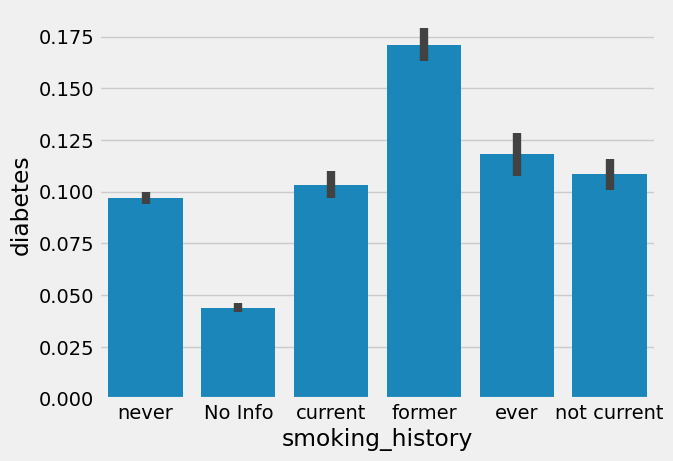

In [129]:
sns.barplot(data=df, x='smoking_history', y='diabetes')

In [130]:
from scipy.stats import chi2_contingency
cont = pd.crosstab(df['smoking_history'], df['diabetes'])
cont

diabetes             0     1
smoking_history             
No Info          31442  1445
current           8249   948
ever              3526   472
former            7709  1590
never            31061  3337
not current       5677   690

In [131]:
chi2_contingency(cont)

Chi2ContingencyResult(statistic=1728.318606625952, pvalue=0.0, dof=5, expected_freq=array([[29985.70890105,  2901.29109895],
       [ 8385.64067148,   811.35932852],
       [ 3645.29644499,   352.70355501],
       [ 8478.64223161,   820.35776839],
       [31363.40848293,  3034.59151707],
       [ 5805.30326795,   561.69673205]]))

In [132]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
x_before = df['smoking_history'].value_counts()
df['smoking_history'] = le.fit_transform(df['smoking_history'])
x_after = df['smoking_history'].value_counts()
print(x_before, x_after)

smoking_history
never          34398
No Info        32887
former          9299
current         9197
not current     6367
ever            3998
Name: count, dtype: int64 smoking_history
4    34398
0    32887
3     9299
1     9197
5     6367
2     3998
Name: count, dtype: int64


# Gender analysis
* gender affect on target
* there is about 12 row containing 'Others' as value in gender so i delete them
* LabelEncoder for gender column

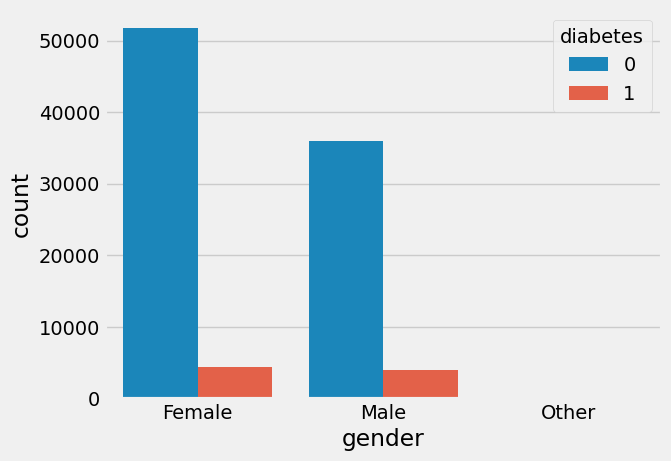

In [133]:
sns.countplot(data=df, x='gender', hue='diabetes')
plt.show()

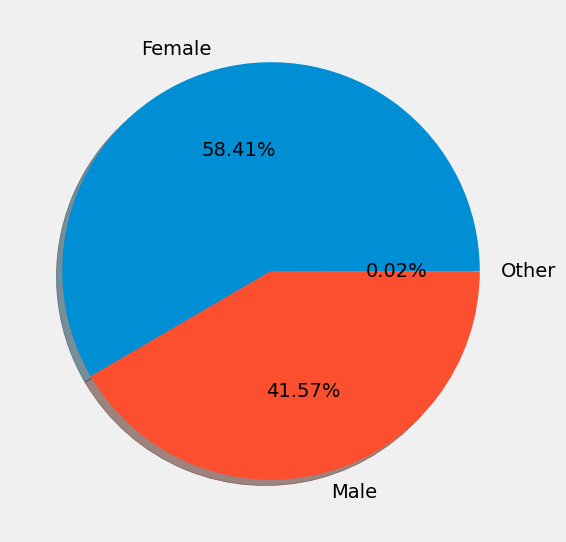

In [134]:
values = df['gender'].value_counts().values
lables = df['gender'].value_counts().index
plt.figure(figsize=(6, 8))
explode = [0, 0, 0]
plt.pie(values, labels = lables, autopct="%1.2f%%", explode = explode, shadow=True)
plt.show()

In [135]:
indx = df[df['gender'] == "Other"].index
df.drop(indx, inplace=True)

In [136]:
males = np.concatenate  ((np.ones(df[(df['gender'] == 'Male') & (df['diabetes'] == 1)].shape[0]),
                        np.zeros(df[(df['gender'] == 'Male') & (df['diabetes'] == 0)].shape[0])))
females = np.concatenate((np.ones(df[(df['gender'] == 'Female') & (df['diabetes'] == 1)].shape[0]),
                        np.zeros(df[(df['gender'] == 'Female') & (df['diabetes'] == 0)].shape[0])))
from scipy.stats import ttest_ind
ttest_ind(males, females, alternative="two-sided")

TtestResult(statistic=11.739436294358574, pvalue=8.412585616352843e-32, df=96126.0)

In [137]:
x_before = df['gender'].value_counts()
df['gender'] = le.fit_transform(df['gender'])
x_after = df['gender'].value_counts()
print(x_before, x_after)

gender
Female    56161
Male      39967
Name: count, dtype: int64 gender
0    56161
1    39967
Name: count, dtype: int64


# Heart disease analysis
* Heart disease affect on target

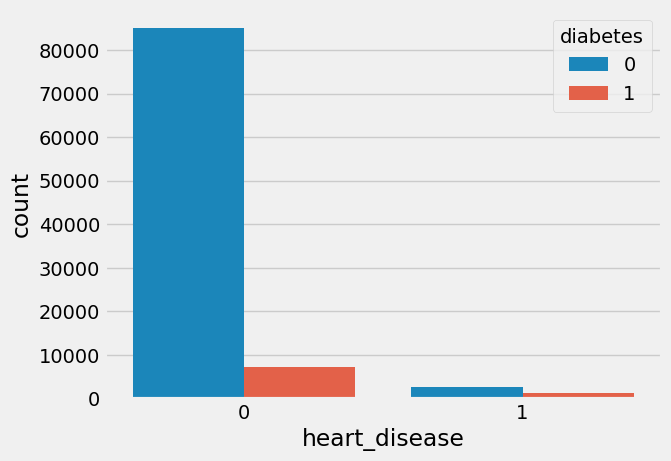

In [138]:
sns.countplot(data=df, x='heart_disease', hue='diabetes')
plt.show()

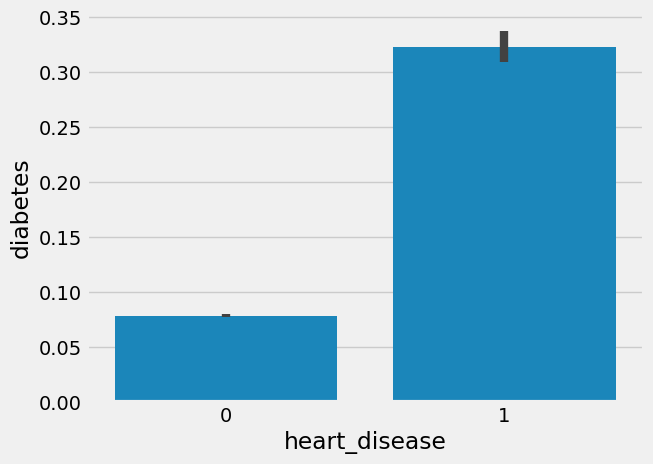

In [139]:
sns.barplot(data=df, x='heart_disease', y='diabetes')
plt.show()

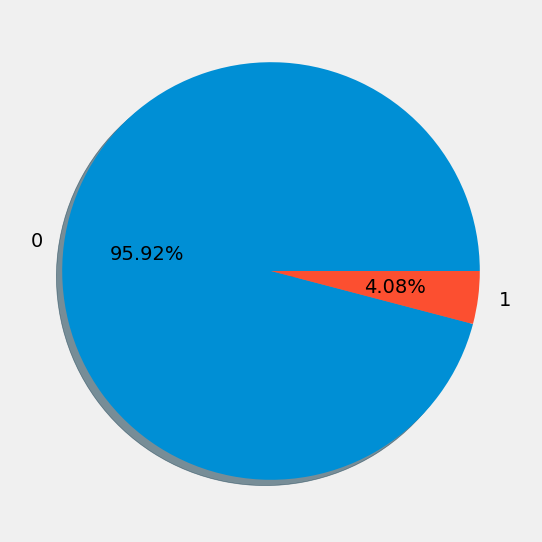

In [140]:
values = df['heart_disease'].value_counts().values
lables = df['heart_disease'].value_counts().index
plt.figure(figsize=(6, 8))
plt.pie(values, labels = lables, autopct="%1.2f%%" , shadow=True)
plt.show()

In [141]:
yes = np.concatenate  ((np.ones(df[(df['heart_disease'] == 1) & (df['diabetes'] == 1)].shape[0]),
                        np.zeros(df[(df['heart_disease'] == 1) & (df['diabetes'] == 0)].shape[0])))
no = np.concatenate((np.ones(df[(df['heart_disease'] == 0) & (df['diabetes'] == 1)].shape[0]),
                        np.zeros(df[(df['heart_disease'] == 0) & (df['diabetes'] == 0)].shape[0])))
from scipy.stats import ttest_ind
ttest_ind(yes, no, alternative="two-sided")

TtestResult(statistic=53.7128536034441, pvalue=0.0, df=96126.0)

# Hypertension analysis
* Hypertension affect on target

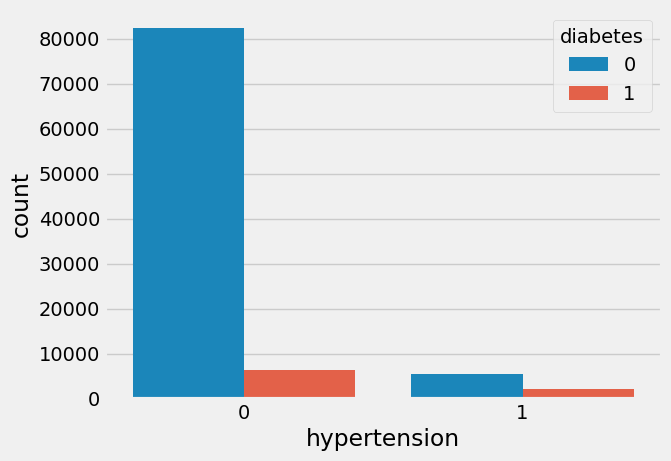

In [142]:
sns.countplot(data=df, x='hypertension', hue='diabetes')
plt.show()

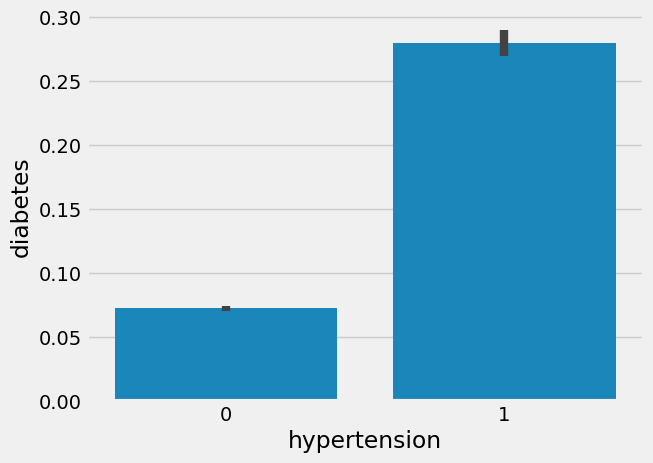

In [143]:
sns.barplot(data=df, x='hypertension', y='diabetes')
plt.show()

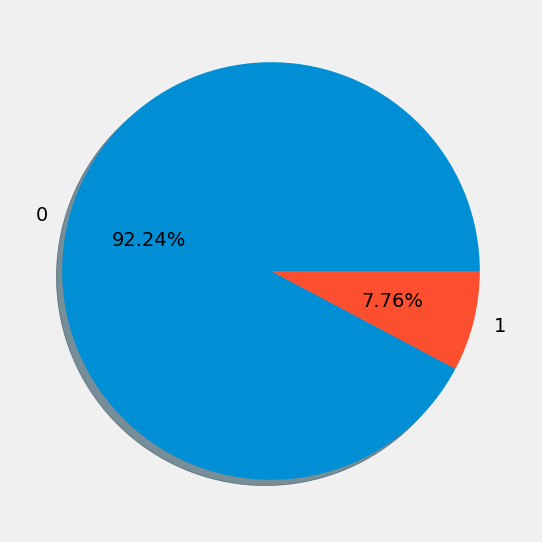

In [144]:
values = df['hypertension'].value_counts().values
lables = df['hypertension'].value_counts().index
plt.figure(figsize=(6, 8))
plt.pie(values, labels = lables, autopct="%1.2f%%" , shadow=True)
plt.show()

In [145]:
yes = np.concatenate  ((np.ones(df[(df['hypertension'] == 1) & (df['diabetes'] == 1)].shape[0]),
                        np.zeros(df[(df['hypertension'] == 1) & (df['diabetes'] == 0)].shape[0])))
no = np.concatenate((np.ones(df[(df['hypertension'] == 0) & (df['diabetes'] == 1)].shape[0]),
                        np.zeros(df[(df['hypertension'] == 0) & (df['diabetes'] == 0)].shape[0])))
from scipy.stats import ttest_ind
ttest_ind(yes, no, alternative="two-sided")

TtestResult(statistic=61.870291625273715, pvalue=0.0, df=96126.0)

# HbA1c analysis
* HbA1c affect on target
* at value > 6.6 there alwayes be diabetes

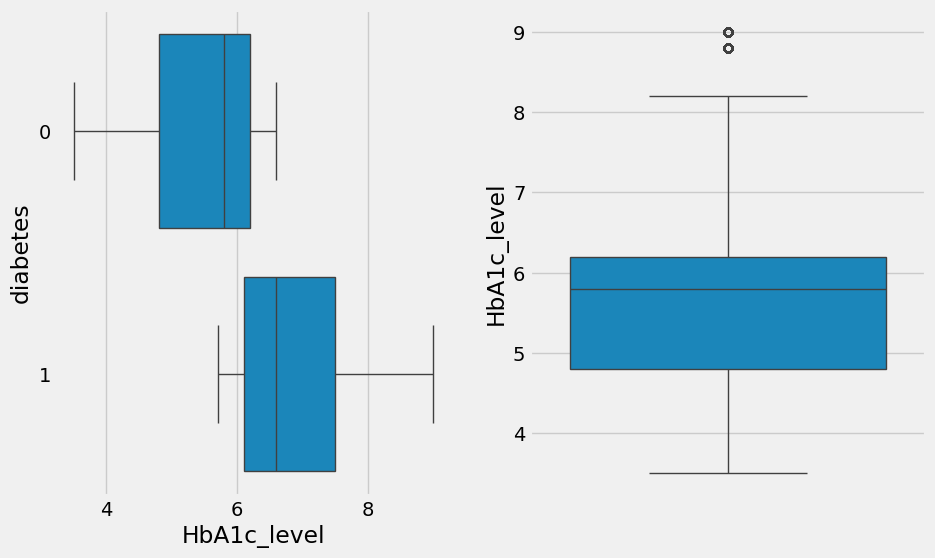

In [146]:
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
sns.boxplot(data=df, x='HbA1c_level', y='diabetes',orient='h')
plt.subplot(1, 2, 2)
sns.boxplot(data=df, y='HbA1c_level', orient='v')
plt.show()

In [147]:
fig = px.scatter(data_frame=df, x ="HbA1c_level", color='diabetes')
fig.update_layout(width=800, height=600,
                xaxis=dict(title='HbA1c_level'),
                yaxis=dict(title='diabetes'))
fig.show()

In [148]:
x0 = df[df['diabetes'] == 0]['HbA1c_level']
x1 = df[df['diabetes'] == 1]['HbA1c_level']
statistic, pvalue = ttest_ind(x0, x1, alternative='two-sided')
print(f'p-value = {pvalue}, mean(X0) = {np.mean(x0)}, mean(X1) = {np.mean(x1)}')

p-value = 0.0, mean(X0) = 5.396934258266207, mean(X1) = 6.9348266918179675


# blood_glucose_level analysis
* blood_glucose_level affect on target

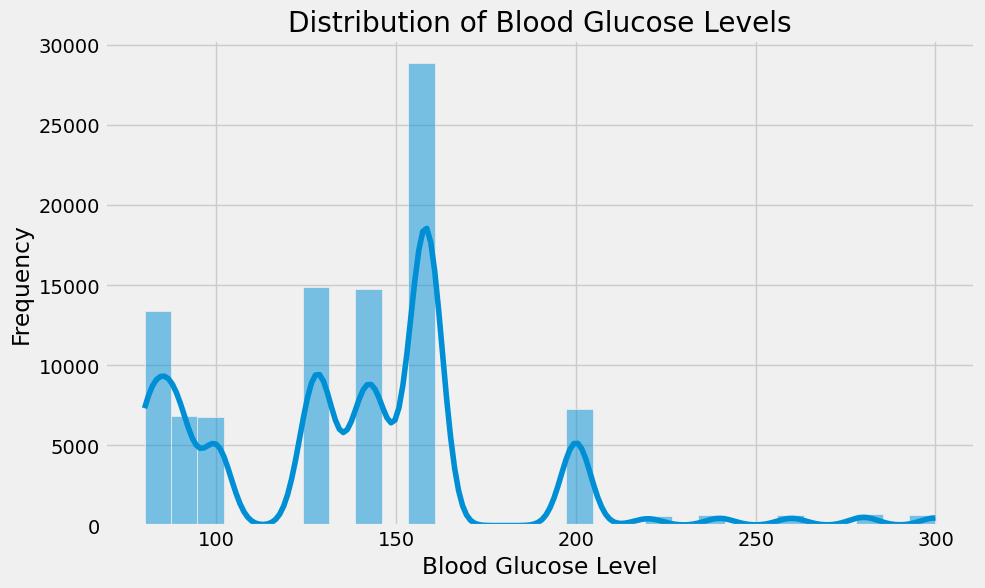

In [149]:
plt.figure(figsize=(10, 6))
sns.histplot(df['blood_glucose_level'], kde=True, bins=30)
plt.title('Distribution of Blood Glucose Levels')
plt.xlabel('Blood Glucose Level')
plt.ylabel('Frequency')
plt.show()

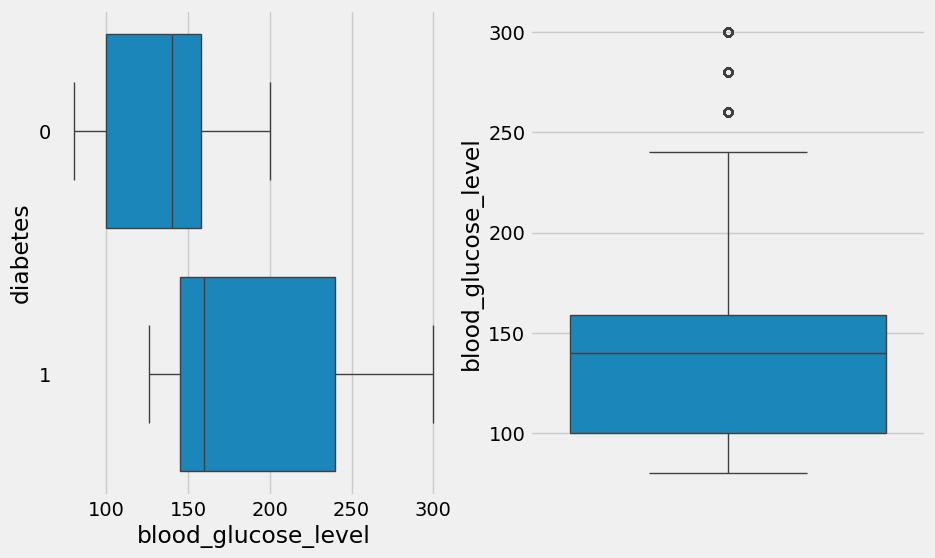

In [150]:
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
sns.boxplot(data=df, x='blood_glucose_level', y='diabetes',orient='h')
plt.subplot(1, 2, 2)
sns.boxplot(data=df, y='blood_glucose_level', orient='v')
plt.show()

In [151]:
x0 = df[df['diabetes'] == 0]['blood_glucose_level']
x1 = df[df['diabetes'] == 1]['blood_glucose_level']
statistic, pvalue = ttest_ind(x0, x1, alternative='two-sided')
print(f'p-value = {pvalue}, mean(X0) = {np.mean(x0)}, mean(X1) = {np.mean(x1)}')

p-value = 0.0, mean(X0) = 132.81712799215023, mean(X1) = 194.0261730723886


# BMI analysis
* bmi affect on target

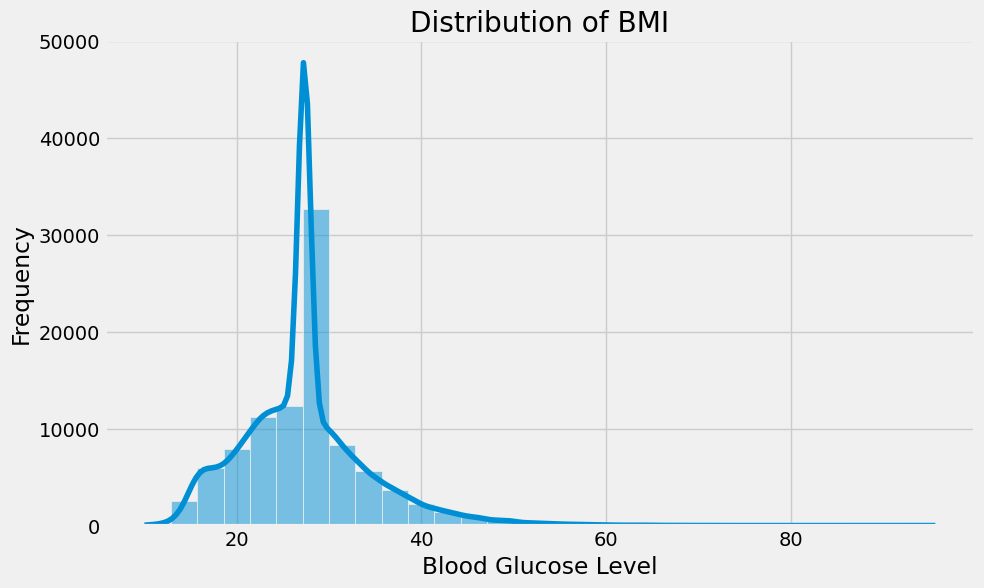

In [152]:
plt.figure(figsize=(10, 6))
sns.histplot(df['bmi'], kde=True, bins=30)
plt.title('Distribution of BMI')
plt.xlabel('Blood Glucose Level')
plt.ylabel('Frequency')
plt.show()

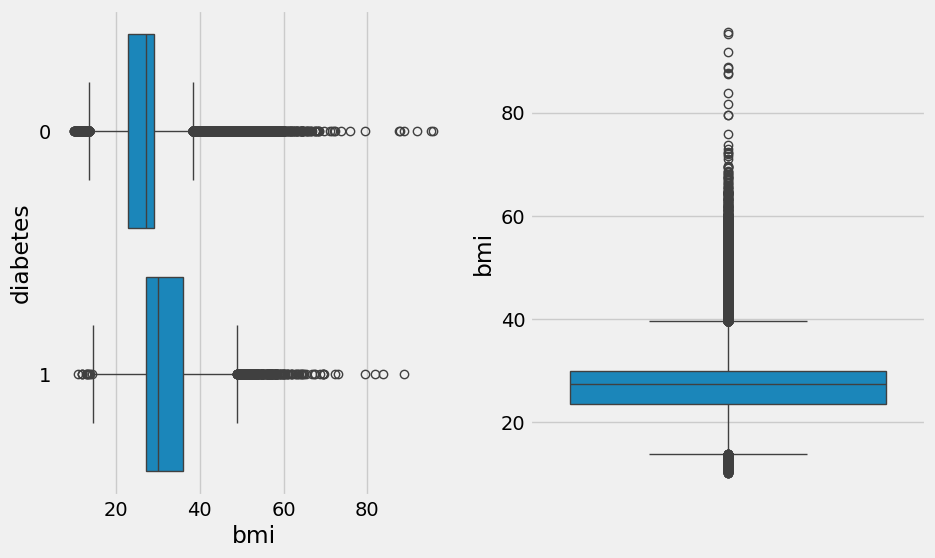

In [153]:
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
sns.boxplot(data=df, x='bmi', y='diabetes',orient='h')
plt.subplot(1, 2, 2)
sns.boxplot(data=df, y='bmi', orient='v')
plt.show()

In [154]:
x0 = df[df['diabetes'] == 0]['bmi']
x1 = df[df['diabetes'] == 1]['bmi']
statistic, pvalue = ttest_ind(x0, x1, alternative='two-sided')
print(f'p-value = {pvalue}, mean(X0) = {np.mean(x0)}, mean(X1) = {np.mean(x1)}')

p-value = 0.0, mean(X0) = 26.868897724938954, mean(X1) = 31.997755246404147


# Some Preprocessing

In [155]:
df[['bmi', 'blood_glucose_level', 'age', 'HbA1c_level']] = df[['bmi', 'blood_glucose_level', 'age', 'HbA1c_level']].apply(np.log)
# BMI log, blood_glucose_level log
df.head()

gender       age  hypertension  heart_disease  smoking_history       bmi  \
0       0  4.382027             0              1                4  3.226447   
1       0  3.988984             0              0                0  3.307619   
2       1  3.332205             0              0                4  3.307619   
3       0  3.583519             0              0                1  3.154870   
4       1  4.330733             1              1                1  3.002708   

   HbA1c_level  blood_glucose_level  diabetes  
0     1.887070             4.941642         0  
1     1.887070             4.382027         0  
2     1.740466             5.062595         0  
3     1.609438             5.043425         0  
4     1.568616             5.043425         0

# Model Selection

In [156]:
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# df[['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']] = scaler.fit_transform(
#     df[['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']])

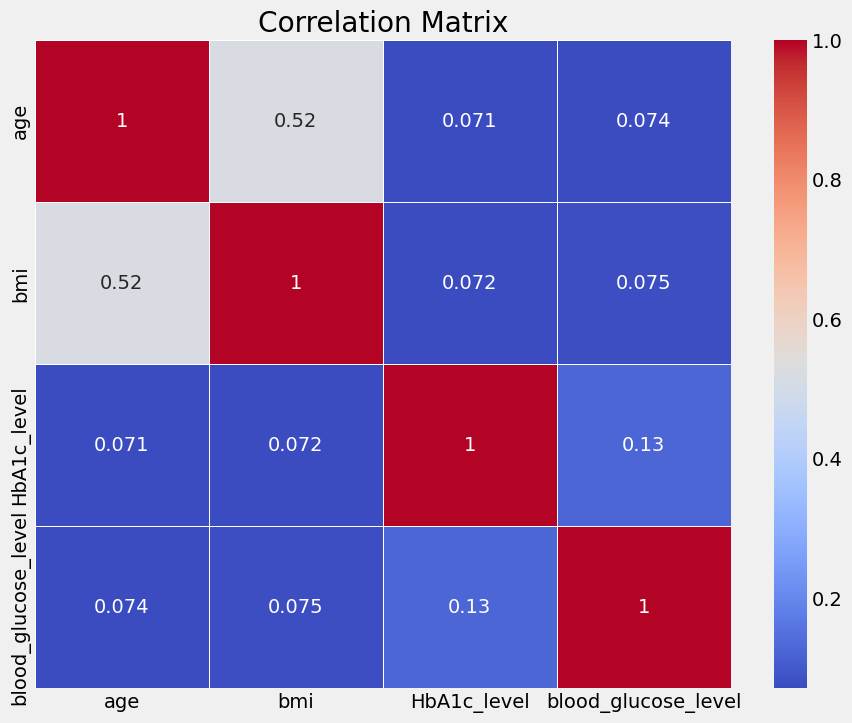

In [157]:
cols = ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']
correlation_matrix = df[cols].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [158]:
X = df.drop('diabetes', axis=1)
y = df['diabetes']
from sklearn.model_selection import train_test_split
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train[['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']] = scaler.fit_transform(
    X_train[['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']])
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)
X_temp[['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']] = scaler.transform(
    X_temp[['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']])

# Random Forest

In [159]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_val_pred = rf.predict(X_val)
print("Validation Accuracy:", accuracy_score(y_val, y_val_pred))

Validation Accuracy: 0.08613336107354624


In [160]:
# Test the final model
y_test_pred = rf.predict(X_test)
print("Test Accuracy:", accuracy_score(y_test, y_test_pred))

Test Accuracy: 0.09081452200145636


# Decision Tree

In [161]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(random_state=42)
tree.fit(X_train, y_train)
y_val_pred = tree.predict(X_val)
print("Decision Tree Validation Accuracy:", accuracy_score(y_val, y_val_pred))

Decision Tree Validation Accuracy: 0.08613336107354624


In [162]:
# Test the final model
y_test_pred = tree.predict(X_test)
print("Decision Tree Test Accuracy:", accuracy_score(y_test, y_test_pred))

Decision Tree Test Accuracy: 0.09081452200145636


# xgboost

In [163]:
import xgboost as xgb
xgb_model = xgb.XGBClassifier(random_state=42)
xgb_model.fit(X_train, y_train)
y_val_pred = xgb_model.predict(X_val)
print("XGBoost Validation Accuracy:", accuracy_score(y_val, y_val_pred))

XGBoost Validation Accuracy: 0.08613336107354624


In [164]:
y_test_pred = xgb_model.predict(X_test)
print("XGBoost Test Accuracy:", accuracy_score(y_test, y_test_pred))

XGBoost Test Accuracy: 0.09081452200145636


# Model Deployment
* I choosed random forest

In [165]:
import pickle
with open('diabetes.pkl', 'wb') as file:
    pickle.dump(rf, file)
with open('diabetes.pkl', 'rb') as file:
    model = pickle.load(file)

In [166]:
with open('scaler.pkl', 'wb') as file:
    pickle.dump(scaler, file)
with open('scaler.pkl', 'rb') as file:
    loaded_scaler = pickle.load(file)

# Testing

In [167]:
new_data = pd.DataFrame({
    'age': [np.log(44)],
    'bmi': [np.log(19.31)],
    'HbA1c_level': [np.log(6.5)],
    'blood_glucose_level': [np.log(200)]
})
transformed_data = loaded_scaler.transform(new_data)
transformed_data

array([[ 0.34354296, -1.29885122,  0.88365776,  1.39907689]])

In [168]:
data = pd.DataFrame({
    'gender': [0],
    'age': transformed_data[0][0],
    'hypertension': [0],
    'heart_disease': [0],
    'smoking_history': [4],
    'bmi': transformed_data[0][1],
    'HbA1c_level': transformed_data[0][2],
    'blood_glucose_level': transformed_data[0][3]
})
model.predict(data)[0]

1